# Advanced Regression
## Surprise Housing Case Study

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

<font color = blue>**Problem Statement**</font><br>

The company is looking at prospective properties to buy to enter the market. It is required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

<font color = blue>**Business Goal**</font><br>

To model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

<br>The solution is divided into the following sections:

- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)

In [2]:
# reading the dataset
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# check the shape

df.shape

(1460, 81)

The dataset has 1460 rows and 81 columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- This shows that there are null values present.
- `Alley`, `PoolQC`, `MiscFeature` and `Fence` have very less non-null values.
- Here target variable is `SalePrice`

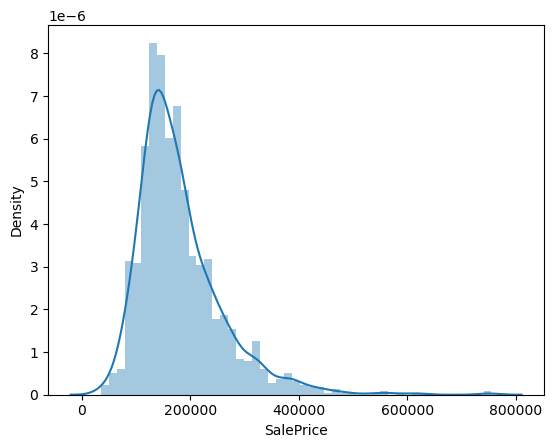

In [5]:
# target variable: SalePrice 

sns.distplot(df['SalePrice'])
plt.show()

## 2. Data Cleaning

Let's now conduct some data cleaning steps. 

In [6]:
# duplicacy check

df["Id"].is_unique      

True

This means that no two Ids are same, hence we have all rows unique.

Let us check the percentage of null values.

In [7]:
print(round(df.isnull().sum()/len(df.index)*100,2))

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

<br>
We have seen in the data description that there are few 'NA' values present. These are not null values rather they are 'not available' values. For e.g. NA in garage variables mean that there is no garage present in that house.
<br><br>So we need to impute these wherever present so that it is not counted as null values.

We have seen that Alley, PoolQC, MiscFeature and Fence have more than 80% missing values. Even if we impute the NA with some other categorical value, that will become the dominating value. Since the percentage is so high, we can drop these columns.

In [8]:
df = df.drop( columns = ['Alley','PoolQC','MiscFeature','Fence'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [9]:
df.shape

(1460, 77)

Now we have 77 columns. Lets start imputing the NA values now one by one.

#### Garage
Lets talk about Garage related variables i.e. `GarageType`, `GarageFinish`, `GarageQual` and `GarageCond`.

In [10]:
print('#NA in Garage Type :',df.GarageType.isnull().sum())
print('#NA in Garage Finish :',df.GarageFinish.isnull().sum())
print('#NA in Garage Qual :',df.GarageQual.isnull().sum())
print('#NA in Garage Cond :',df.GarageCond.isnull().sum())

#NA in Garage Type : 81
#NA in Garage Finish : 81
#NA in Garage Qual : 81
#NA in Garage Cond : 81


This means that 81 houses don't have garage. We can impute these with some other value like NoGarage.

In [11]:
columns = ['GarageType', 'GarageFinish', 'GarageQual','GarageCond']
for col in columns:
    df[col].fillna('NoGarage',inplace=True)

In [12]:
print('#NA in Garage Type :',df.GarageType.isnull().sum())
print('#NA in Garage Finish :',df.GarageFinish.isnull().sum())
print('#NA in Garage Qual :',df.GarageQual.isnull().sum())
print('#NA in Garage Cond :',df.GarageCond.isnull().sum())

#NA in Garage Type : 0
#NA in Garage Finish : 0
#NA in Garage Qual : 0
#NA in Garage Cond : 0


#### Basement

Similarily we have to do the same thing with Basement.
<br> Basement related variables are : `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`

In [13]:
print('#NA in BsmtQual :',df.BsmtQual.isnull().sum())
print('#NA in BsmtCond :',df.BsmtCond.isnull().sum())
print('#NA in BsmtExposure :',df.BsmtExposure.isnull().sum())
print('#NA in BsmtFinType1 :',df.BsmtFinType1.isnull().sum())
print('#NA in BsmtFinType2 :',df.BsmtFinType2.isnull().sum())

#NA in BsmtQual : 37
#NA in BsmtCond : 37
#NA in BsmtExposure : 38
#NA in BsmtFinType1 : 37
#NA in BsmtFinType2 : 38


In [14]:
bsmt_columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2']
for col in bsmt_columns:
    df[col].fillna('NoBasement',inplace=True)

#### GarageYrBlt
Now, lets check `GarageYrBlt` as it has around 5.5% NA values.

In [15]:
df.GarageYrBlt.describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [16]:
df.GarageYrBlt.isnull().sum()

81

In [17]:
df['GarageYrBlt'].fillna(df.GarageYrBlt.median(),inplace=True)

In [18]:
df.GarageYrBlt.isnull().sum()

0

#### FireplaceQu

we can see `FireplaceQu` has 47% null values. So lets check the value_counts for that.

In [19]:
df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [20]:
df.FireplaceQu.isnull().sum()

690

690 out of 1460 values are NA in this and NA means No fireplace according to the data description. So lets impute this.

In [21]:
df['FireplaceQu'].fillna('NoFireplace',inplace=True)

In [22]:
df.FireplaceQu.value_counts()

NoFireplace    690
Gd             380
TA             313
Fa              33
Ex              24
Po              20
Name: FireplaceQu, dtype: int64

#### LotFrontage
Now, lets check `LotFrontage` as it has 17% NA values.

In [23]:
df.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [24]:
df['LotFrontage'].isnull().sum()

259

In [25]:
df['LotFrontage'].fillna(df.LotFrontage.median(),inplace=True)

In [26]:
df['LotFrontage'].isnull().sum()

0

#### MasVnrType

In [27]:
df.MasVnrType.isnull().sum()

8

In [28]:
df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [29]:
df.MasVnrType.fillna(df['MasVnrType'].mode()[0],inplace=True)

In [30]:
df.MasVnrType.isnull().sum()

0

#### MasVnrArea

In [31]:
print("#Null in MasVnrArea :",df.MasVnrArea.isnull().sum())

#Null in MasVnrArea : 8


In [32]:
df['MasVnrArea'].fillna(df.MasVnrArea.median(),inplace=True)

In [33]:
df.MasVnrArea.isnull().sum()

0

#### Electrical

In [34]:
print("#Null in Electrical :",df.Electrical.isnull().sum())

#Null in Electrical : 1


In [35]:
df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [36]:
df.Electrical.fillna(df['Electrical'].mode()[0],inplace=True)

In [37]:
df.Electrical.value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [38]:
#Let us check the percentage of null values again

print(round(df.isnull().sum()/len(df.index)*100,2))

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

Alright, so all the NA values are now replaced and the unimportant columns are deleted.
<br> We have a clean dataset now.

In [39]:
# all numeric (float and int) variables in the dataset

df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [40]:
# correlation matrix
cor = df_numeric.corr()
cor

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009921,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009921,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.033226,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


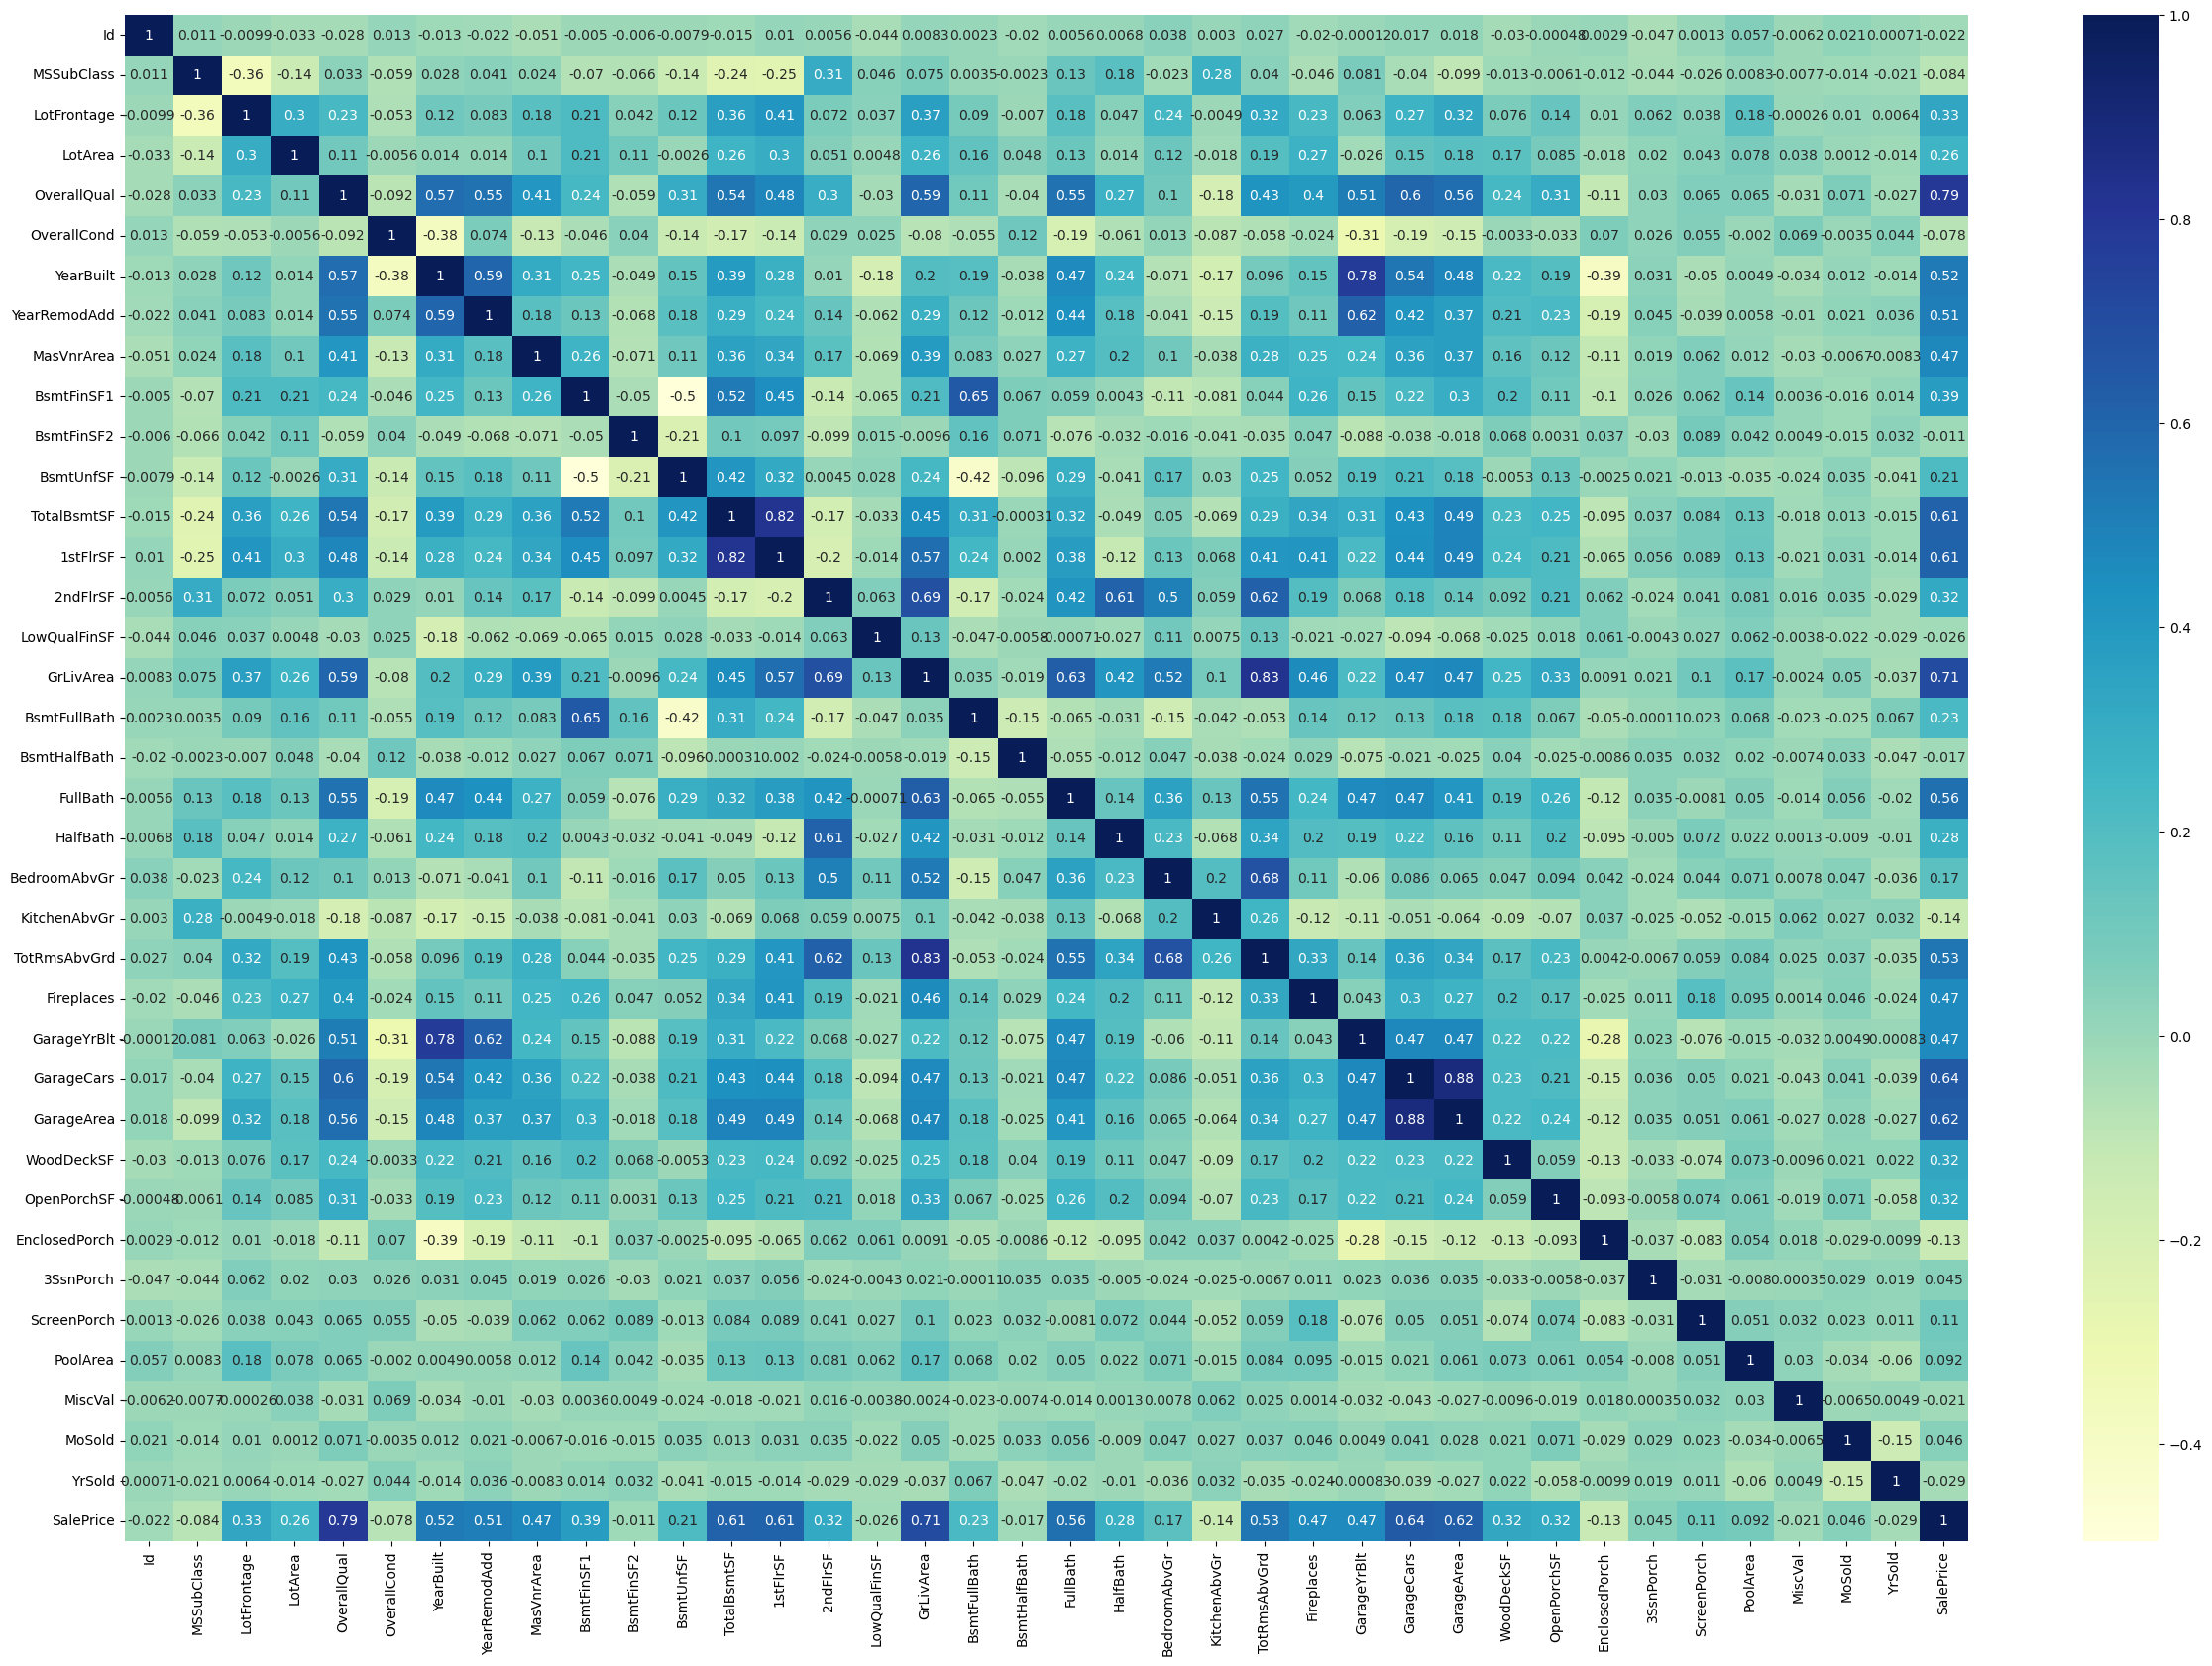

In [41]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


If we concentarte on the last row, we can see the following variables are highly correlated with target variable `SalePrice`:

It is positively correlated with following variables:
- OverallQual
- YearBuilt
- YearRemodAdd
- MasVnrArea
- TotalBsmtSF
- 1stFlrSF
- GrLivArea
- FullBath
- TotRmsAbvGrd
- GarageCars
- GarageArea

It is negatively correlated with following variables:
- Id
- MSSubClass
- OverallCond
- LowQualFinSF
- BsmtHalfBath
- KitchenAbvGr
- EnclosedPorch
- MiscVal
- YrSold

There is some multicollinearity present as well:
- 1stFlrSF and TotalBsmtSF
- GarageCars and GarageArea
- GrLivArea and TotRmsAbvGrd

and so on..

We will keep these points in mind while building the model.

since finding the multicollinearity here will be little difficult. Lets try to find top variables which has a correlation greater than 80%.

In [42]:
cor = cor.abs()
top_cor_variables = np.where(cor>0.8)
top_cor_variables = [(cor.columns[x],cor.columns[y]) for x,y in zip(*top_cor_variables) if x!=y and x<y]
print(top_cor_variables)

[('TotalBsmtSF', '1stFlrSF'), ('GrLivArea', 'TotRmsAbvGrd'), ('GarageCars', 'GarageArea')]


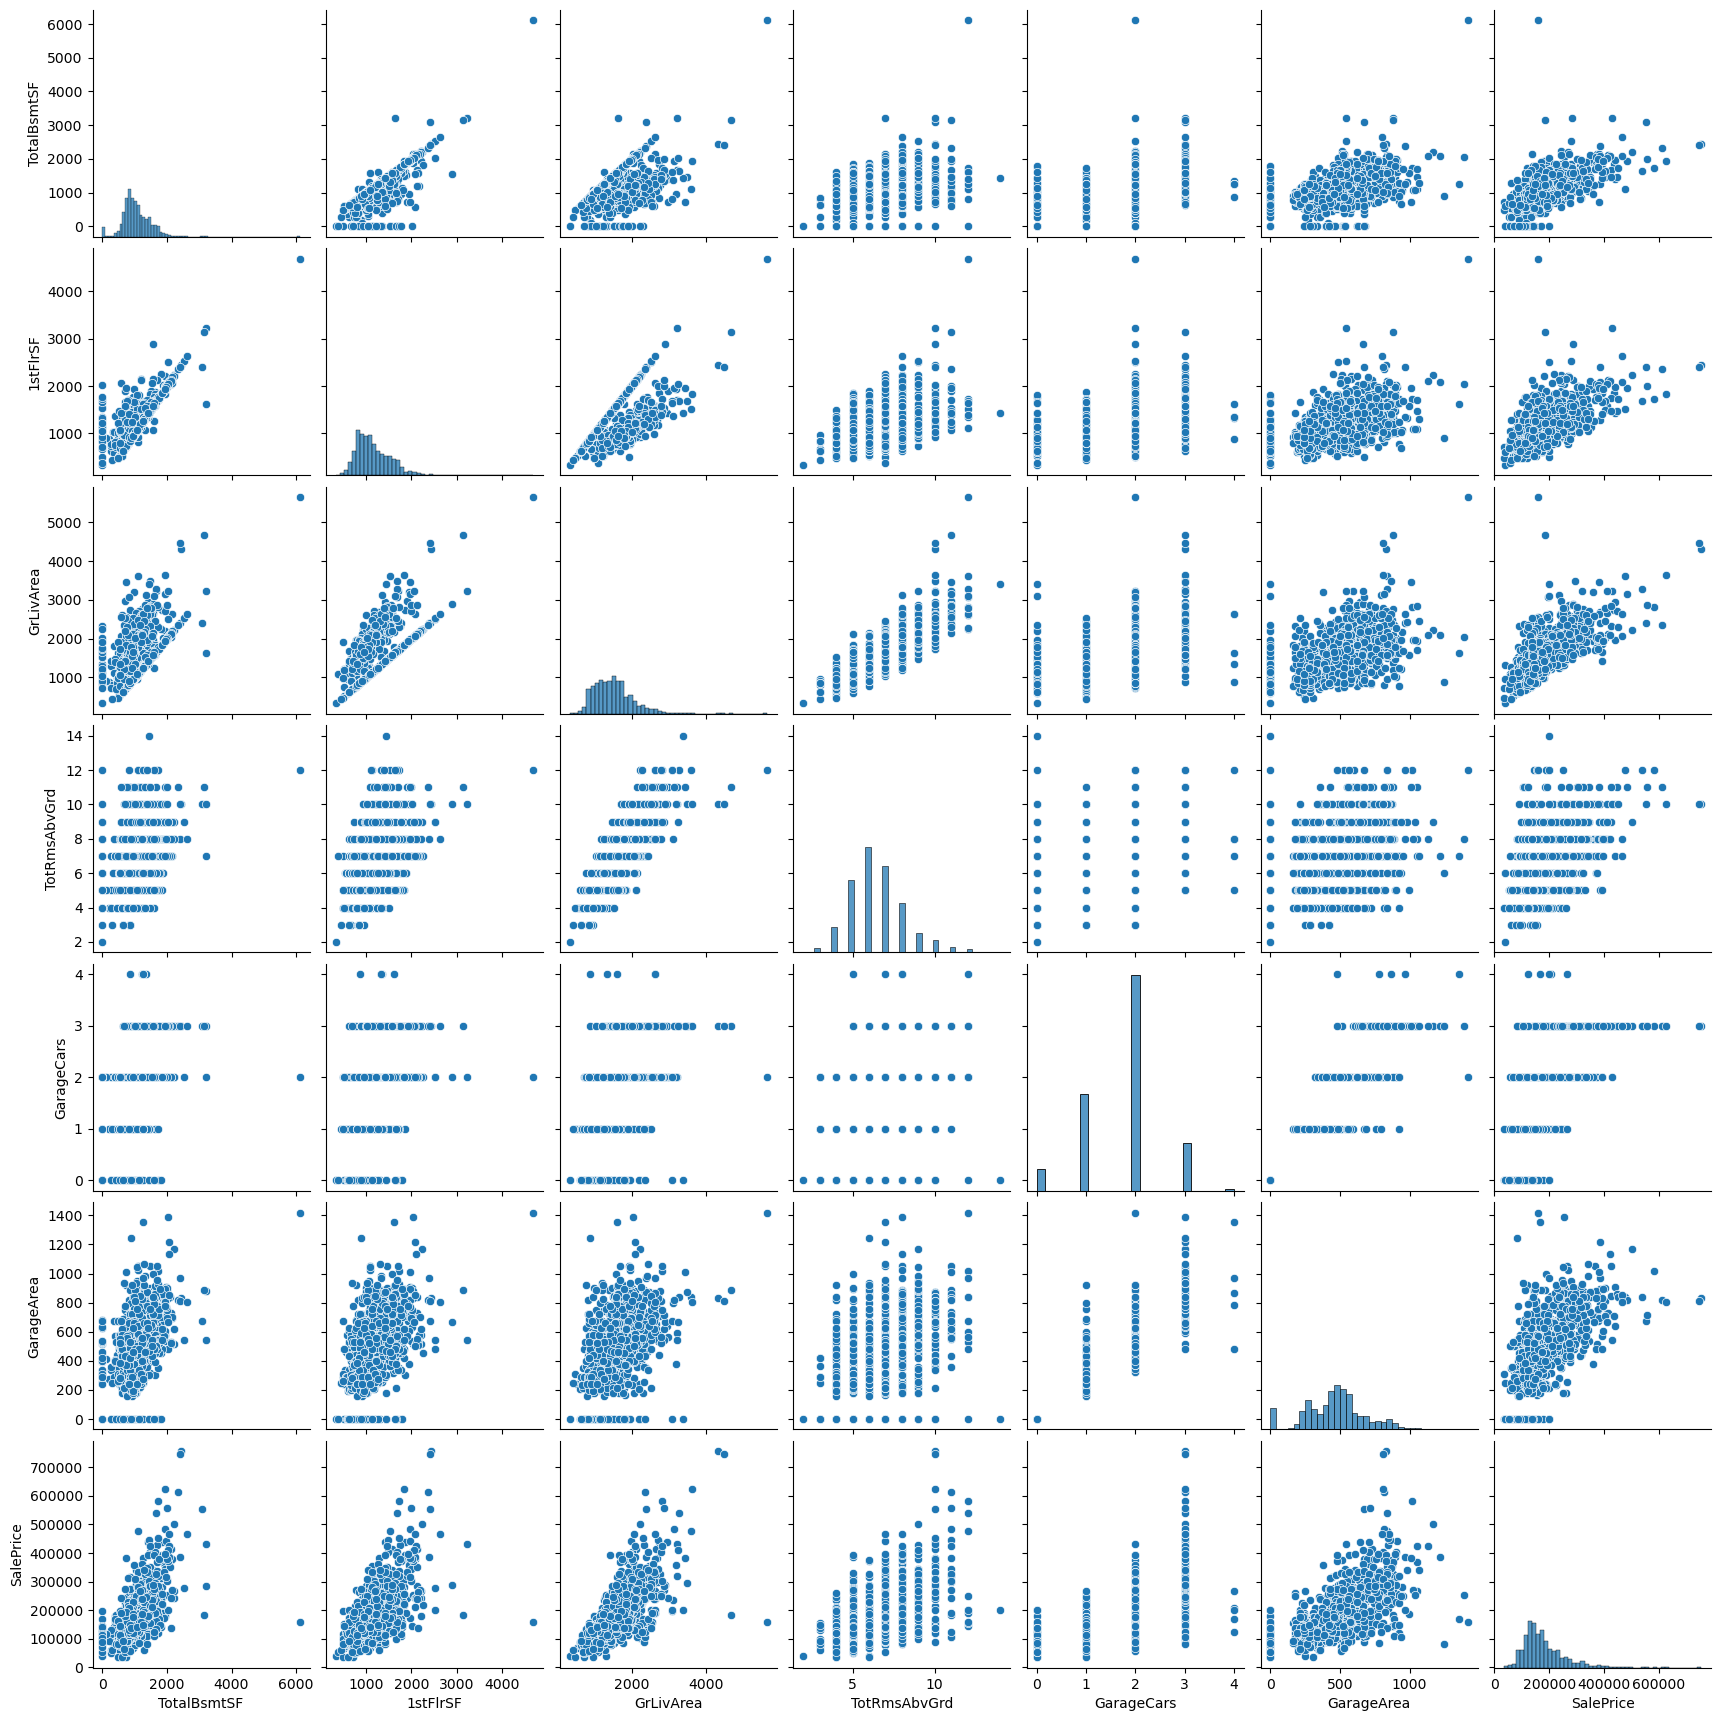

In [43]:
# lets do a pairplot to check the patterns
cols = ['TotalBsmtSF','1stFlrSF','GrLivArea', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea','SalePrice']
sns.pairplot(df[cols])
plt.show()

From pairplot, we can say `TotRmsAbvGrd` and `GarageCars`are not related to SalePrice and hence we can delete these.

In [44]:
df = df.drop( columns = ['TotRmsAbvGrd','GarageArea'])
df.shape

(1460, 75)

#### Derived Variables

Lets try to find the derived variables now.
<br> One can be `AgeOfHouse` (age of the house) which can be formulated from YrSold minus YearBuilt.

In [45]:
# create a new column AgeOfHouse
df['AgeOfHouse'] = df.YrSold - df.YearBuilt

# drop current year and year built columns
df.drop(['YrSold','YearBuilt'], axis=1, inplace=True)

We can drop the Id column as that is also not going to add any value to the model building.

In [46]:
df = df.drop(['Id'],axis=1)
df.shape

(1460, 73)

<Axes: xlabel='SalePrice', ylabel='Density'>

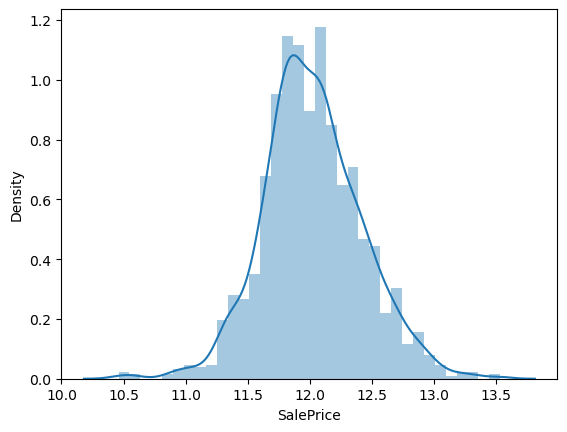

In [47]:
df['SalePrice'] = np.log1p(df['SalePrice'])
sns.distplot(df['SalePrice'])

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [48]:
# split into X and y

 # predictors in variable X
X = df.drop('SalePrice',axis=1)

# response variable in Y
y = df['SalePrice']

In [49]:
# creating dummy variables for categorical variables

# subset all categorical variables
df_categorical = X.select_dtypes(include=['object'])
df_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,NoFireplace,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [50]:
# convert into dummies - one hot encoding
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [51]:
# drop categorical variables 
X = X.drop(list(df_categorical.columns), axis=1)

In [52]:
# concat dummy variables with X
X = pd.concat([X, df_dummies], axis=1)

In [53]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=243)

In [54]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)

### Scaling

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Lets check the number of numerical and categorical values.

In [56]:
# Checking number of numerical and categorical values

numerical_var = df.dtypes[df.dtypes !='object'].index
print("Number of Numerical Variables : ", len(numerical_var))
print("Numerical variables : ",numerical_var)

categorical_var = df.dtypes[df.dtypes =='object'].index
print("Number of Categorical Variables : " ,len(categorical_var))
print("Categorical variables : ",categorical_var)

Number of Numerical Variables :  34
Numerical variables :  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'SalePrice', 'AgeOfHouse'],
      dtype='object')
Number of Categorical Variables :  39
Categorical variables :  Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtE

So we have 34 numerical values and 39 categorical values.

In [57]:
# removing target variable

numerical_var = list(numerical_var)
numerical_var.remove('SalePrice')

# fit transform on train set
X_train[numerical_var] = scaler.fit_transform(X_train[numerical_var])
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,-0.657071,-0.115302,-0.473765,-0.779861,0.383154,-1.694350,-0.558025,0.043512,-0.293313,-0.374367,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
318,0.035976,0.926898,-0.056845,0.649651,-0.533005,0.390956,0.809137,1.160345,-0.293313,-0.454644,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
239,-0.195040,-0.794998,-0.169324,-0.065105,-1.449164,-1.694350,-0.558025,-0.761296,-0.293313,0.171964,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
986,-0.195040,-0.477806,-0.502297,-0.065105,2.215472,0.875911,-0.558025,-0.963574,-0.293313,-0.175904,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1416,3.039179,-0.432493,0.082905,-1.494617,0.383154,-1.694350,-0.558025,-0.963574,-0.293313,0.475233,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [58]:
# transform on test set
X_test[numerical_var] = scaler.transform(X_test[numerical_var])
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,-0.888086,-0.432493,-0.144189,-1.494617,0.383154,-0.675945,-0.558025,0.361992,-0.293313,-0.704396,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
57,0.035976,0.881585,0.112505,0.649651,-0.533005,0.924407,-0.558025,-0.963574,-0.293313,0.660317,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
780,-0.888086,-0.296554,-0.253368,0.649651,-0.533005,0.536443,-0.355087,-0.963574,-0.293313,1.500998,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
382,0.035976,0.428455,-0.120412,0.649651,-0.533005,1.021398,-0.558025,-0.963574,-0.293313,0.836481,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1170,0.498007,0.292515,-0.058786,-0.065105,0.383154,-0.384972,-0.558025,0.159714,-0.293313,0.022559,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


## 4. Model Building and Evaluation

## Linear Regression

Let's now try predicting car prices, a dataset using linear regression.

In [59]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [60]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-3179715.3690656256
[-1.52060786e-02  7.81767943e-03  3.47357315e-02  5.58230959e-02
  4.02892434e-02  2.36918099e-02  1.16774065e-05  1.74605452e+09
  6.41614605e+08  1.68495629e+09 -1.72427926e+09 -1.06235997e+08
 -1.16189582e+08 -1.28675882e+07  1.42005328e+08  1.23034865e-02
  6.69278204e-04  3.19680572e-03  2.25646794e-03  7.33169913e-03
 -1.43100321e-02 -5.29515743e-03  4.39584255e-03  2.91034728e-02
  1.01996064e-02  4.07002866e-03  6.85892999e-03  3.81037593e-03
  8.09580274e-03  2.90453248e-03  1.02119148e-03  7.19979405e-04
 -6.23948425e-02  9.27400291e-02  4.63690683e-02  1.79391026e-01
  1.35035396e-01  5.74129447e-03  2.45153904e-03 -1.29853934e-03
  2.47024000e-03  1.68631598e-03 -6.87431544e-04  7.21601397e-03
 -2.04801746e-03  7.16167688e-03 -7.26862694e-03 -3.52799892e-04
 -2.84837186e-03  4.58277017e-03 -2.06102878e-02  2.84323451e-03
 -7.55995512e-04  1.99696720e-02  1.05839297e-02  7.71742314e-03
  3.35295796e-02 -3.74168903e-03  3.47119570e-03  1.11695826e-02
 -1.1

In [61]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 train:",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 test:",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS train:",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS test:",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE train:",mse_train_lr)
metric.append(mse_train_lr)

print("RMSE train:",mse_train_lr**0.5)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE test:",mse_test_lr)
metric.append(mse_test_lr)

print("RMSE test:",mse_test_lr**0.5)
metric.append(mse_test_lr**0.5)

R2 train: 0.9581906935195057
R2 test: -4.8487018426528915e+17
RSS train: 6.709983268507258
RSS test: 3.4943434309044646e+19
MSE train: 0.006571971859458626
RMSE train: 0.08106769923624714
MSE test: 7.977953038594669e+16
RMSE test: 282452704.68867296


This shows that r2 value is very poor.

## Ridge and Lasso Regression

Let's now try predicting sale prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [62]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 4.0}


In [64]:
#Fitting Ridge model for alpha = 4 and printing coefficients which have been penalised
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.27927128e-02  2.78527674e-03  3.30398298e-02  5.92514955e-02
  3.86146480e-02  2.33039749e-02 -4.30905825e-04  2.60513509e-02
  8.11483711e-03  7.07988597e-03  3.63183486e-02  4.78749433e-02
  4.88623875e-02 -1.15812446e-04  7.57848502e-02  1.53394349e-02
  8.84307927e-04  7.55386699e-03  4.80266940e-03  1.00108484e-02
 -1.43944220e-02 -7.10149128e-03  1.40926074e-04  3.33796478e-02
  1.04726614e-02  3.64937943e-03  7.35756683e-03  4.73971439e-03
  8.70281528e-03 -2.00889059e-03  9.39217954e-04  4.37557636e-04
 -5.19053325e-02  6.86833696e-02  3.52822521e-02  1.34376493e-01
  1.01119572e-01  6.31910579e-03  2.67457495e-03 -3.90556373e-03
  2.32886074e-03  3.42691741e-03  9.49663119e-04  9.56074962e-03
 -2.48220657e-03  7.14227116e-03 -8.25964535e-03 -1.44238795e-03
 -3.43119416e-03  4.25619570e-03 -1.78083531e-02  1.32599189e-03
 -3.41865522e-03  1.23282186e-02  9.70435682e-03  4.37942814e-03
  3.01039053e-02 -1.00679120e-02  8.12322744e-04  1.51314210e-03
 -1.58194298e-02 -3.32651

In [65]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R square train :",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R square test :",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Rss train :",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Rss test :",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE train:",mse_train_lr)
metric2.append(mse_train_lr)

print("RMSE train:",mse_train_lr**0.5)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE test :",mse_test_lr)
metric2.append(mse_test_lr)

print("RMSE test :",mse_test_lr**0.5)
metric2.append(mse_test_lr**0.5)

R square train : 0.9563668026337852
R square test : 0.8692068548139035
Rss train : 7.002699851416305
Rss test : 9.425949099776162
MSE train: 0.0068586678270482915
RMSE train: 0.08281707448979522
MSE test : 0.021520431734648772
RMSE test : 0.14669843807842253


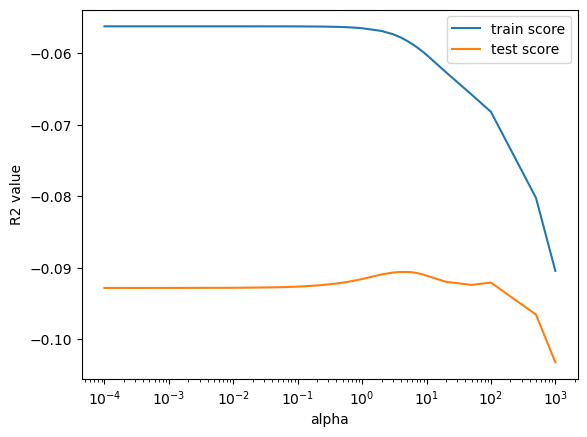

In [66]:
#plotting
model_cv_results = pd.DataFrame(model_cv.cv_results_)
plt.plot(model_cv_results['param_alpha'], model_cv_results['mean_train_score'])
plt.plot(model_cv_results['param_alpha'], model_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.xscale('log')
plt.ylabel('R2 value')
plt.legend(['train score', 'test score'])
plt.show()

As alpha increases:

- train error decreases
- test error is first constant and then decreases

## Lasso

In [67]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [68]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [69]:
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [70]:
lasso.coef_

array([-1.61262086e-02,  2.08610968e-03,  2.41078698e-02,  6.62689614e-02,
        4.02439898e-02,  2.38003769e-02,  4.56033324e-05,  1.53927672e-02,
        8.55770266e-04, -0.00000000e+00,  3.79414235e-02,  2.40009372e-03,
        0.00000000e+00, -4.05746284e-03,  1.42040081e-01,  2.00867167e-02,
        0.00000000e+00,  6.13439927e-03,  4.09156761e-03,  4.62429597e-03,
       -1.17834084e-02,  0.00000000e+00,  0.00000000e+00,  3.46271101e-02,
        9.62235868e-03,  3.82877612e-03,  3.75925631e-03,  3.80934179e-03,
        7.12251361e-03, -4.79527133e-03, -0.00000000e+00, -0.00000000e+00,
       -5.29846777e-02,  3.52764960e-02,  1.88030062e-02,  7.44493007e-02,
        4.65672455e-02,  4.75788842e-03,  9.19110007e-04, -4.15465631e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.70264764e-03,
       -2.15137733e-03,  7.52648211e-03, -4.45221578e-03, -3.11210762e-05,
       -5.96633914e-05,  1.35041959e-03, -8.20107100e-03,  0.00000000e+00,
       -3.55135636e-03,  

In [71]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R square train :",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R square test :",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Rss train :",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Rss test :",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE train:",mse_train_lr)
metric3.append(mse_train_lr)

print("RMSE train:",mse_train_lr**0.5)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE test :",mse_test_lr)
metric3.append(mse_test_lr)

print("RMSE test :",mse_test_lr**0.5)
metric3.append(mse_test_lr**0.5)

R square train : 0.9505553591166847
R square test : 0.8724446319321947
Rss train : 7.9353794877985155
Rss test : 9.192610248034278
MSE train: 0.007772164042897664
RMSE train: 0.0881598777386724
MSE test : 0.020987694630215246
RMSE test : 0.14487130368094037


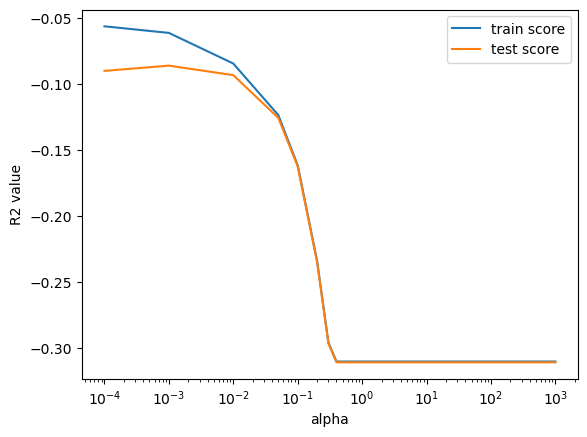

In [72]:
model_cv_results2 = pd.DataFrame(model_cv.cv_results_)

#plotting
plt.plot(model_cv_results2['param_alpha'], model_cv_results2['mean_train_score'])
plt.plot(model_cv_results2['param_alpha'], model_cv_results2['mean_test_score'])
plt.xlabel('alpha')
plt.xscale('log')
plt.ylabel('R2 value')
plt.legend(['train score', 'test score'])
plt.show()

With increase in alpha value, both train and test error decreases.

In [73]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','MSE (Train)','MSE (Test)','RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': metric }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.581907e-01,0.956367,0.950555
1,R2 Score (Test),-4.848702e+17,0.869207,0.872445
2,RSS (Train),6.709983e+00,7.002700,7.935379
3,RSS (Test),3.494343e+19,9.425949,9.192610
4,MSE (Train),6.571972e-03,0.006859,0.007772
5,MSE (Test),8.106770e-02,0.082817,0.088160
6,RMSE (Train),7.977953e+16,0.021520,0.020988
7,RMSE (Test),2.824527e+08,0.146698,0.144871


## Lets observe the changes in the coefficients after regularization

In [74]:
betas = pd.DataFrame(index=X.columns)

In [75]:
betas.rows = X.columns

In [76]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [77]:
pd.set_option('display.max_rows', None)
betas.head(80)

,Linear,Ridge,Lasso
MSSubClass,-1.520608e-02,-0.012793,-0.016126
LotFrontage,7.817679e-03,0.002785,0.002086
LotArea,3.473573e-02,0.033040,0.024108
OverallQual,5.582310e-02,0.059251,0.066269
OverallCond,4.028924e-02,0.038615,0.040244
YearRemodAdd,2.369181e-02,0.023304,0.023800
MasVnrArea,1.167741e-05,-0.000431,0.000046
BsmtFinSF1,1.746055e+09,0.026051,0.015393
BsmtFinSF2,6.416146e+08,0.008115,0.000856
BsmtUnfSF,1.684956e+09,0.007080,-0.000000


In [78]:
betas[betas['Lasso'] == 0].shape

(73, 3)

73 features have been removed by lasso

In [79]:
# selected features :

betas.loc[betas['Lasso'] != 0, 'Lasso']

MSSubClass                -0.016126
LotFrontage                0.002086
LotArea                    0.024108
OverallQual                0.066269
OverallCond                0.040244
YearRemodAdd               0.023800
MasVnrArea                 0.000046
BsmtFinSF1                 0.015393
BsmtFinSF2                 0.000856
TotalBsmtSF                0.037941
1stFlrSF                   0.002400
LowQualFinSF              -0.004057
GrLivArea                  0.142040
BsmtFullBath               0.020087
FullBath                   0.006134
HalfBath                   0.004092
BedroomAbvGr               0.004624
KitchenAbvGr              -0.011783
GarageCars                 0.034627
WoodDeckSF                 0.009622
OpenPorchSF                0.003829
EnclosedPorch              0.003759
3SsnPorch                  0.003809
ScreenPorch                0.007123
PoolArea                  -0.004795
AgeOfHouse                -0.052985
MSZoning_FV                0.035276
MSZoning_RH                0

#### Top 10 features in Ridge Regression

In [80]:
betas['Ridge'].sort_values(ascending=False)[:10]

RoofMatl_CompShg    0.275774
RoofMatl_Tar&Grv    0.183106
RoofMatl_WdShngl    0.137018
MSZoning_RL         0.134376
RoofMatl_WdShake    0.113699
MSZoning_RM         0.101120
GrLivArea           0.075785
MSZoning_FV         0.068683
RoofMatl_Membran    0.062715
RoofMatl_Metal      0.059642
Name: Ridge, dtype: float64

#### Top 10 features in Lasso Regression

In [81]:
betas['Lasso'].sort_values(ascending=False)[:10]

RoofMatl_CompShg    0.242023
RoofMatl_Tar&Grv    0.162588
GrLivArea           0.142040
RoofMatl_WdShngl    0.121258
RoofMatl_WdShake    0.101795
MSZoning_RL         0.074449
OverallQual         0.066269
RoofMatl_Membran    0.052098
RoofMatl_Metal      0.050648
RoofMatl_Roll       0.048608
Name: Lasso, dtype: float64

#### Optimal value of alpha in Ridge : 4
#### Optimal value of aplha in Lasso : 0.001

## Coding Questions:

### 1. Double the alpha

In [82]:
#Fitting Ridge model for alpha = 4*2 i.e. 8 and printing coefficients
alpha = 8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.22268357e-02  2.75892347e-04  3.17078121e-02  6.09779876e-02
  3.76089785e-02  2.32102549e-02 -6.00220501e-04  2.02992812e-02
  7.38280273e-03  6.46270672e-03  2.96181397e-02  4.71718833e-02
  4.73560498e-02  5.74302843e-04  7.40889216e-02  1.70575483e-02
  9.28368717e-04  1.01561609e-02  6.27359029e-03  1.14705211e-02
 -1.42448830e-02 -7.38936885e-03 -1.94686713e-03  3.55508558e-02
  1.06230273e-02  3.34489675e-03  7.50200865e-03  5.15476054e-03
  8.99706167e-03 -4.72046655e-03  8.69967735e-04  2.62549776e-04
 -4.58324933e-02  5.46098945e-02  2.87962705e-02  1.08055384e-01
  8.08319712e-02  6.54462437e-03  2.74975166e-03 -5.48671075e-03
  2.17502100e-03  4.35745253e-03  1.84176784e-03  1.07569590e-02
 -2.70578682e-03  7.20684161e-03 -8.75369298e-03 -2.06419942e-03
 -3.71482461e-03  4.06216312e-03 -1.59765756e-02  5.47157372e-04
 -4.65239327e-03  8.57637531e-03  9.51160856e-03  2.90901461e-03
  2.85130651e-02 -1.31338441e-02 -4.32405024e-04 -3.46975569e-03
 -1.76720117e-02 -4.59208

In [83]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R square train :",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R square test :",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Rss train :",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Rss test :",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE train:",mse_train_lr)
metric2.append(mse_train_lr)

print("RMSE train:",mse_train_lr**0.5)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE test :",mse_test_lr)
metric2.append(mse_test_lr)

print("RMSE test :",mse_test_lr**0.5)
metric2.append(mse_test_lr**0.5)

R square train : 0.9537251879652039
R square test : 0.8721002342302973
Rss train : 7.426653074278145
Rss test : 9.217430166567063
MSE train: 0.007273901150125509
RMSE train: 0.08528716873085605
MSE test : 0.021044361110883706
RMSE test : 0.1450667470886547


In [84]:
lasso = Lasso(alpha=0.002)

lasso.fit(X_train, y_train)
print(lasso.coef_)

[-1.81729275e-02  0.00000000e+00  1.79277302e-02  7.74425269e-02
  3.87982651e-02  2.25123786e-02  0.00000000e+00  4.67153891e-03
  0.00000000e+00 -0.00000000e+00  2.69621334e-02  2.57148749e-03
  0.00000000e+00 -2.47926646e-03  1.37906627e-01  2.51074610e-02
  0.00000000e+00  7.70660788e-03  3.60084624e-03  4.50337940e-03
 -9.19304934e-03  0.00000000e+00 -0.00000000e+00  3.89809306e-02
  8.96031751e-03  1.63425190e-03  2.42212987e-03  2.68895257e-03
  6.68041484e-03 -9.57214431e-03 -0.00000000e+00 -0.00000000e+00
 -4.78551138e-02  5.01167552e-03  4.60324406e-03  2.06749814e-02
  0.00000000e+00  4.03643376e-03  4.70546249e-04 -6.91927177e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.63176396e-03
 -2.22199809e-03  7.76956318e-03 -2.96609919e-03 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -2.69510428e-03  3.35017403e-03  1.08748521e-02  0.00000000e+00
  2.50871647e-02 -1.22856070e-02 -3.52464177e-04 -9.53433420e-03
 -1.15827327e-02 -1.72562

In [85]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R square train :",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R square test :",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Rss train :",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Rss test :",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE train:",mse_train_lr)
metric3.append(mse_train_lr)

print("RMSE train:",mse_train_lr**0.5)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE test :",mse_test_lr)
metric3.append(mse_test_lr)

print("RMSE test :",mse_test_lr**0.5)
metric3.append(mse_test_lr**0.5)

R square train : 0.938111442795243
R square test : 0.8714626375913678
Rss train : 9.932505901520138
Rss test : 9.26338023112271
MSE train: 0.009728213419706306
RMSE train: 0.09863170595557144
MSE test : 0.021149269934070115
RMSE test : 0.14542788568245815


In [86]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','MSE (Train)','MSE (Test)','RMSE (Train)','RMSE (Test)'], }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.953725,0.938111
1,R2 Score (Test),0.872100,0.871463
2,RSS (Train),7.426653,9.932506
3,RSS (Test),9.217430,9.263380
4,MSE (Train),0.007274,0.009728
5,MSE (Test),0.085287,0.098632
6,RMSE (Train),0.021044,0.021149
7,RMSE (Test),0.145067,0.145428


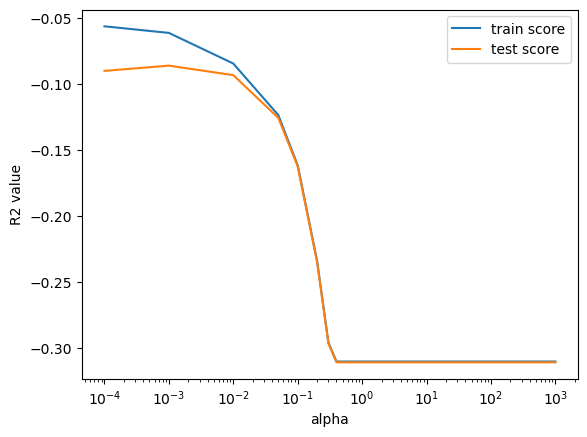

In [87]:
#plotting
model_cv_results = pd.DataFrame(model_cv.cv_results_)
plt.plot(model_cv_results['param_alpha'], model_cv_results['mean_train_score'])
plt.plot(model_cv_results['param_alpha'], model_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.xscale('log')
plt.ylabel('R2 value')
plt.legend(['train score', 'test score'])
plt.show()

In [88]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [89]:
betas['Ridge'].sort_values(ascending=False)[:10]

RoofMatl_CompShg    0.217453
RoofMatl_Tar&Grv    0.144053
RoofMatl_WdShngl    0.109205
MSZoning_RL         0.108055
RoofMatl_WdShake    0.087417
MSZoning_RM         0.080832
GrLivArea           0.074089
OverallQual         0.060978
MSZoning_FV         0.054610
RoofMatl_Membran    0.049942
Name: Ridge, dtype: float64

In [90]:
betas['Lasso'].sort_values(ascending=False)[:10]

GrLivArea           0.137907
RoofMatl_CompShg    0.127549
RoofMatl_Tar&Grv    0.083241
OverallQual         0.077443
RoofMatl_WdShngl    0.066577
RoofMatl_WdShake    0.052293
GarageCars          0.038981
OverallCond         0.038798
TotalBsmtSF         0.026962
BsmtFullBath        0.025107
Name: Lasso, dtype: float64

### 3. Removing the top 5 variables

In [91]:
# top 5 variables are : RoofMatl_CompShg, RoofMatl_Tar&Grv, GrLivArea, RoofMatl_WdShngl, RoofMatl_WdShake  

# storing them in a variable
top5 = ['RoofMatl_CompShg', 'RoofMatl_Tar&Grv', 'GrLivArea', 'RoofMatl_WdShngl', 'RoofMatl_WdShake']
top5


['RoofMatl_CompShg',
 'RoofMatl_Tar&Grv',
 'GrLivArea',
 'RoofMatl_WdShngl',
 'RoofMatl_WdShake']

In [92]:
# printing X train and test set
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,-0.657071,-0.115302,-0.473765,-0.779861,0.383154,-1.694350,-0.558025,0.043512,-0.293313,-0.374367,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
318,0.035976,0.926898,-0.056845,0.649651,-0.533005,0.390956,0.809137,1.160345,-0.293313,-0.454644,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
239,-0.195040,-0.794998,-0.169324,-0.065105,-1.449164,-1.694350,-0.558025,-0.761296,-0.293313,0.171964,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
986,-0.195040,-0.477806,-0.502297,-0.065105,2.215472,0.875911,-0.558025,-0.963574,-0.293313,-0.175904,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1416,3.039179,-0.432493,0.082905,-1.494617,0.383154,-1.694350,-0.558025,-0.963574,-0.293313,0.475233,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [93]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,-0.888086,-0.432493,-0.144189,-1.494617,0.383154,-0.675945,-0.558025,0.361992,-0.293313,-0.704396,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
57,0.035976,0.881585,0.112505,0.649651,-0.533005,0.924407,-0.558025,-0.963574,-0.293313,0.660317,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
780,-0.888086,-0.296554,-0.253368,0.649651,-0.533005,0.536443,-0.355087,-0.963574,-0.293313,1.500998,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
382,0.035976,0.428455,-0.120412,0.649651,-0.533005,1.021398,-0.558025,-0.963574,-0.293313,0.836481,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1170,0.498007,0.292515,-0.058786,-0.065105,0.383154,-0.384972,-0.558025,0.159714,-0.293313,0.022559,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [94]:
X_train1 = X_train.drop(top5, axis = 1)
X_test1 = X_test.drop(top5, axis = 1)

In [95]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train1, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [96]:
model_cv.best_params_

{'alpha': 0.001}

In [97]:
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train1, y_train) 

Lasso(alpha=0.001)

In [98]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train1)
y_pred_test = lasso.predict(X_test1)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R square train :",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R square test :",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Rss train :",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Rss test :",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE train:",mse_train_lr)
metric3.append(mse_train_lr)

print("RMSE train:",mse_train_lr**0.5)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE test :",mse_test_lr)
metric3.append(mse_test_lr)

print("RMSE test :",mse_test_lr**0.5)
metric3.append(mse_test_lr**0.5)

R square train : 0.9332528937199062
R square test : 0.8710398117759115
Rss train : 10.712255334100195
Rss test : 9.293852276189687
MSE train: 0.010491924910969829
RMSE train: 0.10243009768114951
MSE test : 0.021218840813218464
RMSE test : 0.1456668830352955


In [99]:
betas = pd.DataFrame(index=X_train1.columns)
betas.rows = X_train1.columns

betas['Lasso'] = lasso.coef_

In [100]:
betas['Lasso'].sort_values(ascending=False)[:10]

2ndFlrSF                0.100230
1stFlrSF                0.099158
MSZoning_RL             0.084011
OverallQual             0.072898
MSZoning_RM             0.057104
GarageCars              0.041877
MSZoning_FV             0.039181
OverallCond             0.033899
Neighborhood_Crawfor    0.027526
BsmtFullBath            0.025117
Name: Lasso, dtype: float64